In [1]:
import spacy
nlp = spacy.load('en_core_web_sm')
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())
pool = mp.Pool(mp.cpu_count())


d:\anaconda3\envs\tf-gpu-1.13\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\anaconda3\envs\tf-gpu-1.13\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\anaconda3\envs\tf-gpu-1.13\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\anaconda3\envs\tf-gpu-1.13\lib\site-packages\tensorflow\python\framework\dtypes.py:519: 

Number of processors:  12


In [4]:
# Tokenizing Function to run in parallel
def text_tokenizer_mp(doc):
    tok_doc = ' '.join([token.lemma_ for token in nlp(doc) if not token.is_stop])
    return tok_doc

In [5]:
# Tokenizing Function that lemmatizes words and removes Stop Words
def text_tokenizer(documents):
    tokenized_documents = []
    for doc in documents:
        tok_doc = ' '.join([token.lemma_ for token in nlp(doc) if not token.is_stop])
        tokenized_documents.append(tok_doc)
    return tokenized_documents

In [ ]:
def remove_index(doc):
    return doc[1]

Material Dispersion parameter is  98.1070868229859  ps/(nm*km)
RMS Pulse Broadening is  1.962141736459718  ns/km
2nd RMS Pulse Broadening is  0.10006922855944562  ns/km


d:\anaconda3\envs\tf-gpu-1.13\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


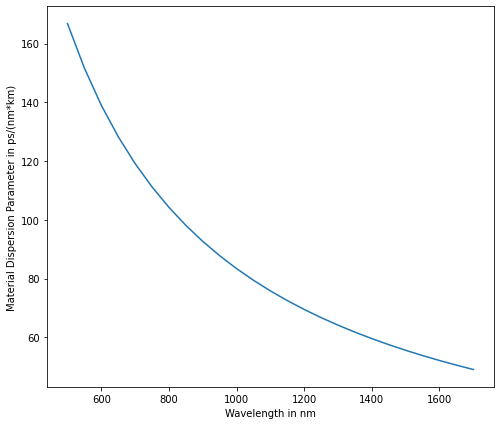

In [2]:
import math
import scipy.constants as sc
import matplotlib.pyplot as plt


P = 0.025
wavelength = 0.85 * math.pow(10,-6)
c = sc.c
M = P*math.pow(10,6)/(c*wavelength)
print("Material Dispersion parameter is ",M," ps/(nm*km)")


delLambda = 20 * math.pow(10,-9)
L = 1000
rmsPB = P*L*delLambda*math.pow(10,9)/(c*wavelength)
print("RMS Pulse Broadening is ",rmsPB," ns/km")


dll = 0.0012
wl = 0.85*math.pow(10,-6)
rmsPB2 = (dll/c)*P*math.pow(10,12)
print("2nd RMS Pulse Broadening is ", rmsPB2, " ns/km")
i = 500
wavelengths = []
MDC = []
while i < 1750:
    wavelengths.append(i)
    MDC.append(P*math.pow(10,6)/(c*i*math.pow(10,-9)))
    i+=50

plt.rcParams['figure.figsize'] = [8, 7]
fig, ax = plt.subplots()
ax.plot(wavelengths,MDC)
ax.set_xlabel("Wavelength in nm")
ax.set_ylabel("Material Dispersion Parameter in ps/(nm*km)")
fig.show()